# Exploring Why Civil Resistance Works


This is the second assignment of the course "Applied Machine Learning" of the 7th semester of DMST, AUEB. In this assignment, we will replicate some findings and give some explanations about them from the book [Why Civil Resistance Works](https://www.ericachenoweth.com/research/wcrw) by [Erica Chenoweth](https://www.ericachenoweth.com/) and Maria J. Stephan, that examines whether nonviolent campaigns are more effective than violent campaigns 

Instructor: Mr. Louridas <br>
Submission Date: 04-12-2023

<b>Nasos Karas, 8200062 <br>
   Department of Management Science and Technology<br>
Athens University of Economics and Business<br>
t8200062@aueb.gr
</b>
---

In [1]:
# we are using this to display our figures in the center
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


To run this notebook, you must first install the following libraries:
* `matplotlib`
* `pandas`
* `numpy`
* `statsmodel`
* `seaborn`

First, let's read our data from the respective excel file.

In [2]:
import pandas as pd
df = pd.read_excel('NAVCO.xlsx')
df

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,OTHER,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,0,613,10000.0,0.000641,1,1,NaN,1.0,1,1
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,0,3281,10000.0,0.000685,1,0,NaN,1.0,0,1
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,0,1370,20000.0,0.000893,1,0,NaN,1.0,0,0
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,0,4391,60000.0,0.001625,1,1,NaN,1.0,1,0
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,0,442,300000.0,0.091068,1,0,0.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249,Zambian independence movement,Zambia,1961,1963,British rule,1,0,0,0,...,0,913,1000000.0,0.285063,0,1,0.0,0.0,0,0
385,248,Zambia anti-single party rule,Zambia,1990,1991,One-party rule,1,0,0,0,...,0,488,23000.0,0.002791,1,0,0.0,1.0,0,0
386,12,anti-Chiluba campaign,Zambia,2001,2001,Chiluba regime,1,0,0,0,...,0,213,3000.0,0.000277,0,0,0.0,0.0,0,0
387,250,Zimbabwe African People's Union,Zimbabwe,1972,1979,Smith/Muzorena regime,0,1,0,0,...,0,2556,1000.0,0.000145,1,0,NaN,0.0,1,0


## 1. Exploration of Historical Trends

[1.1] The first task of this assignment is to replicate a plot showing the frequency of nonviolent and violent campaigns where the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should also be stacked on each other.

* The first thing that we need to do is to create a column that states which decade each campaign belongs to. To do so we will perform an integer division to get the first three digits of the EYEAR column and then multiply it by 10. <br>
(We can also use the ceil method from the numpy library to round down the years to the closest decade.)

* We should also check that all campaigns have an end year and there are no missing dates by using the isnull() method.

In [3]:
df['EYEAR'].isnull().sum() #if the sum is zero, there are no missing values

0

In [4]:
df['DECADE'] = (df['EYEAR'] // 10) * 10

In [5]:
df

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE
0,4,Afghans,Afghanistan,1978,1979,Afghan government,1,0,0,0,...,613,10000.0,0.000641,1,1,NaN,1.0,1,1,1970
1,3,Afghan resistance,Afghanistan,1980,1989,Soviet occupation,1,0,0,0,...,3281,10000.0,0.000685,1,0,NaN,1.0,0,1,1980
2,218,Taliban/anti-government forces,Afghanistan,1992,1996,Afghan regime,1,0,0,0,...,1370,20000.0,0.000893,1,0,NaN,1.0,0,0,1990
3,217,Taliban,Afghanistan,2001,2014,Afghan government,0,0,1,1,...,4391,60000.0,0.001625,1,1,NaN,1.0,1,0,2010
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,442,300000.0,0.091068,1,0,0.0,1.0,1,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,249,Zambian independence movement,Zambia,1961,1963,British rule,1,0,0,0,...,913,1000000.0,0.285063,0,1,0.0,0.0,0,0,1960
385,248,Zambia anti-single party rule,Zambia,1990,1991,One-party rule,1,0,0,0,...,488,23000.0,0.002791,1,0,0.0,1.0,0,0,1990
386,12,anti-Chiluba campaign,Zambia,2001,2001,Chiluba regime,1,0,0,0,...,213,3000.0,0.000277,0,0,0.0,0.0,0,0,2000
387,250,Zimbabwe African People's Union,Zimbabwe,1972,1979,Smith/Muzorena regime,0,1,0,0,...,2556,1000.0,0.000145,1,0,NaN,0.0,1,0,1970


* We will create a new dataframe containing only the necessary columns, which are the DECADE and the VIOL/NONVIOL which are two binary columns that indicate whether a campaign was violent or not.

In [6]:
dfplot = df[['VIOL', 'NONVIOL', 'DECADE']]
dfplot

,VIOL,NONVIOL,DECADE
0,1,0,1970
1,1,0,1980
2,1,0,1990
3,1,0,2010
4,0,1,1990
...,...,...,...
384,0,1,1960
385,0,1,1990
386,0,1,2000
387,1,0,1970


* We will create a new dataframe, containing the sum of the violent and non-violent campaigns, grouped by decades, so that we can make a scatter plot easily.

In [7]:
dfnew = dfplot[dfplot['VIOL'] == 1].groupby('DECADE').sum()
dfnew['NONVIOL'] = dfplot[dfplot['NONVIOL'] == 1].groupby('DECADE')['NONVIOL'].sum()
dfnew.reset_index(inplace=True)
dfnew


,DECADE,VIOL,NONVIOL
0,1940,12,2
1,1950,25,9
2,1960,21,8
3,1970,27,13
4,1980,17,30
5,1990,54,36
6,2000,23,37
7,2010,41,34


* Using the data from the dataframe we made and matplotlib, we are going to make a stacked plot that has the frequency of violent and nonviolent campaigns throughout the decades.

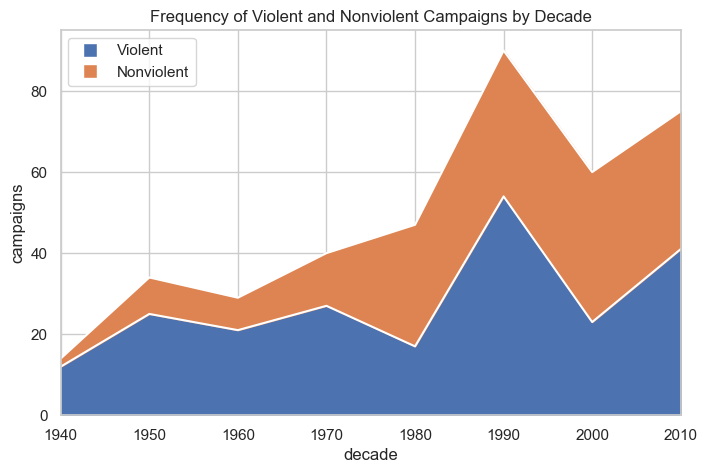

In [61]:
import matplotlib.pyplot as plt

ax = dfnew.set_index('DECADE')[['VIOL', 'NONVIOL']].plot(kind='line', stacked=True, color=['white'], figsize=(8, 5))

palette = sns.color_palette()

ax.fill_between(dfnew['DECADE'], 0, dfnew['VIOL'], color=palette[0])
ax.fill_between(dfnew['DECADE'], dfnew['VIOL'], dfnew['VIOL'] + dfnew['NONVIOL'], color=palette[1])
plt.title('Frequency of Violent and Nonviolent Campaigns by Decade')

# Set legend colors manually
legend_colors = [palette[0], palette[1]]
legend_labels = ['Violent', 'Nonviolent']
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]

# Add the legend
plt.legend(legend_patches, legend_labels, loc='upper left')
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.yticks(range(0, 81, 20)) # make the y axis ranges as the prototype
plt.xlim(1940, 2010) # Set x-axis range from 1940 to 2010
plt.ylim(0, 95) # Set y-axis range from 0 to 95
plt.show()


[1.2] The next task is to create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. The plot should have two vertical axes, one for each of the metrics.

* To do so, we need a dataframe with three columns: the decade, the frequency of nonviol campaigns and the percentage of success. We already have the first two columns from the first task (dfnew). <BR>
* To calculate the percentage of success, we will need to know how many nonviol campaigns are successful for each decade. To do so, we will create a new column that groups only the non violent campaigns by decade and returns the sum of the success column ( the unsuccessful campaigns have value equal to zero, so they do not affect our calculations.)

In [9]:
nonv_df = dfnew[['DECADE', 'NONVIOL']]
nonv_df['SUM_SUCCESS'] = df[df['NONVIOL'] == 1].groupby('DECADE')['SUCCESS'].sum().reset_index(drop=True)
nonv_df

,DECADE,NONVIOL,SUM_SUCCESS
0,1940,2,1
1,1950,9,2
2,1960,8,2
3,1970,13,7
4,1980,30,14
5,1990,36,30
6,2000,37,25
7,2010,34,13


* Now, we can simply calculate the success rate by dividing the sum_success column with the nonviol column which represents the frequency of all the nonviol campaigns per decade.

In [10]:
nonv_df['SUCCESS_RATE'] = nonv_df['SUM_SUCCESS']/nonv_df['NONVIOL']
nonv_df

,DECADE,NONVIOL,SUM_SUCCESS,SUCCESS_RATE
0,1940,2,1,0.500000
1,1950,9,2,0.222222
2,1960,8,2,0.250000
3,1970,13,7,0.538462
4,1980,30,14,0.466667
5,1990,36,30,0.833333
6,2000,37,25,0.675676
7,2010,34,13,0.382353


* Now that our data are ready, we will make a bar chart with two y axes, one for the number of campaigns, and one for the success rate.

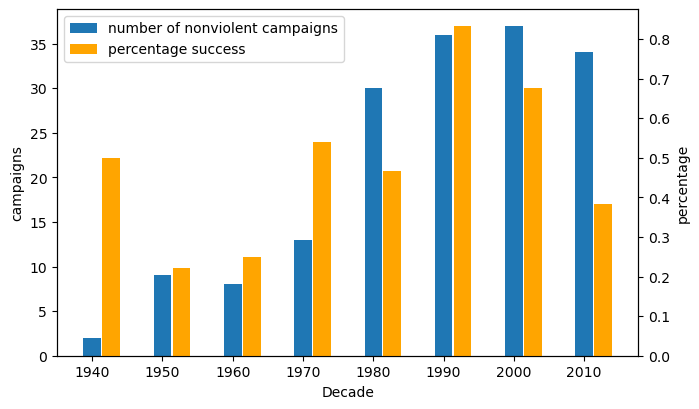

In [11]:
import numpy as np

fig, ax1 = plt.subplots(figsize=(7.5, 4.5))

color = 'tab:blue'
ax1.set_xlabel('Decade')
ax1.set_ylabel('campaigns', color='black')
ax1.bar(nonv_df['DECADE'], nonv_df['NONVIOL'], color=color, width = 2.5, label = 'number of nonviolent campaigns')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'orange'
ax2.set_ylabel('percentage', color='black')  # we already handled the x-label with ax1
ax2.bar(nonv_df['DECADE'] + 2.7, nonv_df['SUCCESS_RATE'], color=color, width = 2.5, label = 'percentage success')
ax2.tick_params(axis='y', labelcolor='black')

fig.legend(loc='upper left',bbox_to_anchor=(0.125, 0.88)) #specify the coordinates of the legend
plt.show()


[1.3] The third and final task of the first question is to create a plot showing the success rate for violent and nonviolent campaigns by decade. <br><br>
To do so, we will need three columns, the decades and the success rate of nonviolent and violent campaigns. We already have the first two, so we only need to calculate the success rate of the violent campaigns the same way we did for the nonviolent ones.

In [12]:
sr_df = pd.DataFrame() #make a new dataframe
sr_df[['DECADE', 'NONVIOL_SR']] = nonv_df[['DECADE', 'SUCCESS_RATE']] #pass the two columns we need to the new df
a = df[df['VIOL'] == 1].groupby('DECADE')['SUCCESS'].sum().reset_index(drop=True) #get how many successful violent campaigns exist per decade
sr_df['VIOL_SR'] = a/dfnew['VIOL'] #divide the successful campaigns to the total campaigns per decade to get the success rate
sr_df

,DECADE,NONVIOL_SR,VIOL_SR
0,1940,0.500000,0.500000
1,1950,0.222222,0.320000
2,1960,0.250000,0.190476
3,1970,0.538462,0.444444
4,1980,0.466667,0.294118
5,1990,0.833333,0.277778
6,2000,0.675676,0.130435
7,2010,0.382353,0.073171


* Again, we have the data ready and we can plot them easily by making a bar plot with 2 bars. For the violent campaign bars, in the x coordinate we add a constant -<i>here the value 3.2</i>- so that the two bars are right next to each other.

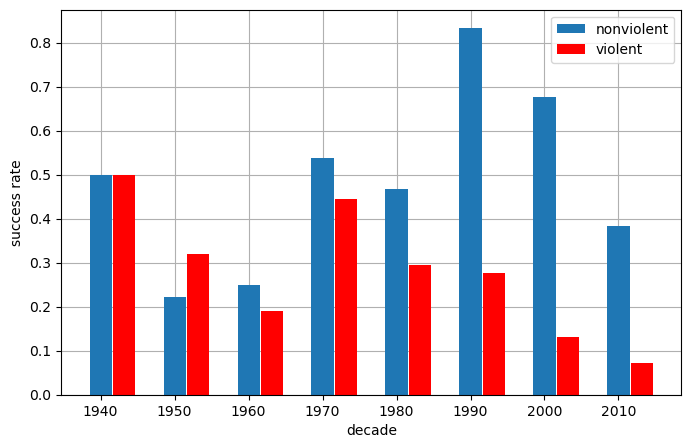

In [13]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Set the bar width
bar_width = 3

# Create bars for each category
bar1 = ax.bar(sr_df['DECADE'], sr_df['NONVIOL_SR'], bar_width, label='nonviolent',zorder = 2)
bar2 = ax.bar(sr_df['DECADE'] + 3.2, sr_df['VIOL_SR'], bar_width,color = 'red', label='violent', zorder = 2)

# Set labels, title, and legend
ax.set_xlabel('decade')
ax.set_ylabel('success rate')
ax.legend()
ax.grid(zorder=1) #zorder acts as an ordering tool among elements to determine which elements are on top of others.
# Show the plot
plt.show()

If we take a look at the graph, we can see that up until 1970, there was no significant difference between the success rate of violent and nonviolent campaigns. However, from the 80s and afterwards, the difference is rather larger, indicating that nonviolent campaigns tend to have much more likelihood of succeeding, as opposed to violent ones that, according to the graph, will most likely fail.

## 2. Largest Resistance Campaigns, 1946-2014

In the second question, we need to create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%. We should also investigate, outside the largest resistance campaigns, if we can find anything about Greece.

* The first thing that we are going to do, is to take all the rows with a participation percentage of at least 2% from the first dataframe. We can see that there are 32 resistance campaigns that have a participation of at least 2.0%.

In [14]:
largecampaigns = df[df['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]
largecampaigns

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE
4,5,Albanian anti-communist,Albania,1990,1991,Communist regime,1,0,0,0,...,442,300000.0,0.091068,1,0,0.0,1.0,1,0,1990
14,33,pro-democracy movement,Argentina,1977,1983,military junta,1,0,0,0,...,2415,9000000.0,0.302013,1,0,1.0,0.0,1,0,1980
19,255,Anti-King Hamad Campaign,Bahrain,2011,2014,Monarchy of King Hamad,0,0,1,1,...,1050,100000.0,0.063816,1,0,1.0,0.0,0,0,2010
34,383,Brunei Revolt,Brunei,1962,1962,Brunei government,0,0,1,0,...,9,4000.0,0.044641,1,0,NaN,0.0,1,1,1960
63,26,anti-Pinochet campaign,Chile,1983,1989,Augusto Pinochet,1,0,0,0,...,2409,700000.0,0.054264,1,1,1.0,0.0,1,0,1980
80,240,Velvet Revolution,Czechoslovakia,1989,1989,Communist regime,1,0,0,0,...,24,500000.0,0.048544,1,0,0.0,0.0,1,0,1980
87,260,Djibouti Arab Spring,Djibouti,2011,2011,Gov't of Djibouti (President Guelleh),0,0,1,0,...,35,30000.0,0.034645,1,0,0.0,0.0,0,0,2010
89,74,East German uprising,East Germany,1953,1953,Communist regime,0,0,1,0,...,17,400000.0,0.022005,1,0,0.0,0.0,1,0,1950
98,262,Anti-Morsi Protests,Egypt,2013,2013,President Morsi,1,0,0,0,...,9,14000000.0,0.155889,1,1,1.0,0.0,1,0,2010
104,202,Singing Revolution,Estonia,1987,1991,Communist regime,1,0,0,0,...,1459,300000.0,0.192146,1,0,0.0,0.0,1,0,1990


* Let's keep only the necessary columns for the plot, so that there is not a lot of noise in the dataframe. We will need the location and target which will represent the name of each bar, the population percentage, and the columns success, failure and limited to color the bars according to the extent the campaigns achieved their goals.<br> 
* We will also sort the dataframe by the population percentage in descending order.
* We will also make a name column which will have the location name followed by the character : , followed by target to be used in the plot.

In [15]:
largecampaigns = largecampaigns.loc[:, ['LOCATION', 'TARGET', 'PERCENTAGE POPULAR PARTICIPATION', 'SUCCESS', 'FAILURE', 'LIMITED']]
largecampaigns['NAME'] = largecampaigns['LOCATION'] + ' : ' + largecampaigns['TARGET']
largecampaigns = largecampaigns.sort_values(by='PERCENTAGE POPULAR PARTICIPATION', ascending = False)
largecampaigns

,LOCATION,TARGET,PERCENTAGE POPULAR PARTICIPATION,SUCCESS,FAILURE,LIMITED,NAME
295,Slovenia,Yugoslavian rule,0.450129,1,0,0,Slovenia : Yugoslavian rule
14,Argentina,military junta,0.302013,1,0,0,Argentina : military junta
384,Zambia,British rule,0.285063,1,0,0,Zambia : British rule
192,Lebanon,Syrian forces,0.250824,1,0,0,Lebanon : Syrian forces
194,Lebanon,Government of Prime Minister Fouad Siniora,0.194598,1,0,0,Lebanon : Government of Prime Minister Fouad S...
104,Estonia,Communist regime,0.192146,1,0,0,Estonia : Communist regime
342,Tunisia,Council negotiating end to political crisis,0.179470,1,0,0,Tunisia : Council negotiating end to political...
98,Egypt,President Morsi,0.155889,1,0,0,Egypt : President Morsi
187,Latvia,Communist regime,0.094319,1,0,0,Latvia : Communist regime
4,Albania,Communist regime,0.091068,1,0,0,Albania : Communist regime


* We also need the percentage in a percent form, ranging from 0 to 100, so we have to multiply the 'PERCENTAGE POPULAR PARTICIPATION' by 100 so that we can plot our data correctly.

In [16]:
largecampaigns['PERCENTAGE POPULAR PARTICIPATION'] = largecampaigns['PERCENTAGE POPULAR PARTICIPATION'] * 100

* We would also like to color the bars of the plot depending on their state of success. If the campaign was successful, the color must be black (success=1). If the campaign failed, the color must be red(failure=1). If the campaign was limited - meaning that it achieved some of its goals - the color must be grey(limited=1).  <br>
* That is why, we will create a method that checks whether each row is true in the success, failure or limited column, and creates a new column containing only the first letter of the state of each campaign ( s for success, l for limited and f for failure).

In [17]:
def determine_result(row):
    if row['SUCCESS'] == 1:
        return 's'
    elif row['FAILURE'] == 1:
        return 'f'
    else:
        return 'l'

# Apply the custom function to create the 'Result' column
largecampaigns['RESULT'] = largecampaigns.apply(determine_result, axis=1)
largecampaigns

,LOCATION,TARGET,PERCENTAGE POPULAR PARTICIPATION,SUCCESS,FAILURE,LIMITED,NAME,RESULT
295,Slovenia,Yugoslavian rule,45.012851,1,0,0,Slovenia : Yugoslavian rule,s
14,Argentina,military junta,30.201342,1,0,0,Argentina : military junta,s
384,Zambia,British rule,28.506271,1,0,0,Zambia : British rule,s
192,Lebanon,Syrian forces,25.082446,1,0,0,Lebanon : Syrian forces,s
194,Lebanon,Government of Prime Minister Fouad Siniora,19.459763,1,0,0,Lebanon : Government of Prime Minister Fouad S...,s
104,Estonia,Communist regime,19.214585,1,0,0,Estonia : Communist regime,s
342,Tunisia,Council negotiating end to political crisis,17.947025,1,0,0,Tunisia : Council negotiating end to political...,s
98,Egypt,President Morsi,15.588910,1,0,0,Egypt : President Morsi,s
187,Latvia,Communist regime,9.431894,1,0,0,Latvia : Communist regime,s
4,Albania,Communist regime,9.106841,1,0,0,Albania : Communist regime,s


* Using matplotlib, we are now ready to create the horizontal bar plot. We will create a new column, named COLOR, where we will use the RESULT column that we created. In the RESULT column, we will apply a lambda function where depending the value of the row, it will return the color that corresponds to the respective state of success.

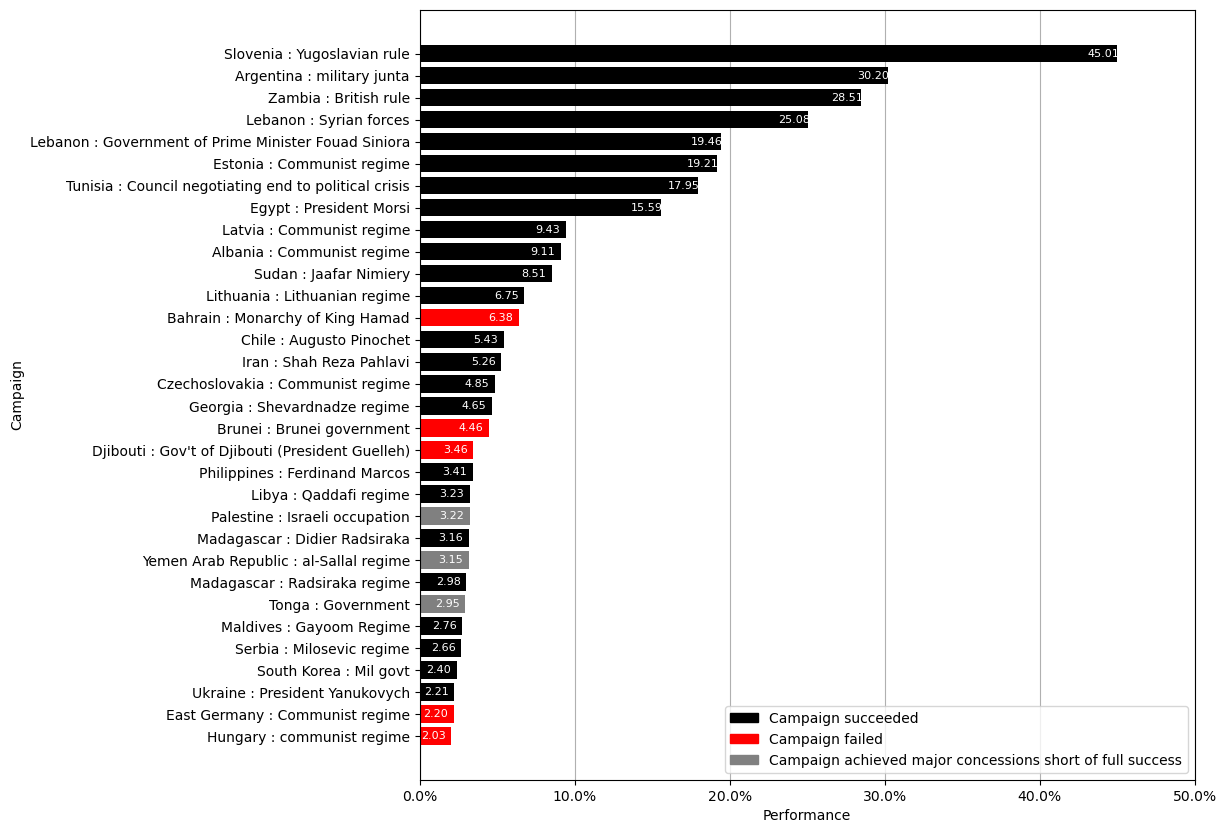

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

largecampaigns['COLOR'] = largecampaigns['RESULT'].apply(lambda x: 'black' if x == 's' else 'red' if x == 'f' else 'grey')

fig, ax = plt.subplots(figsize=(10, 10))

# Plot horizontal bars with different colors
bars = ax.barh(largecampaigns['NAME'], largecampaigns['PERCENTAGE POPULAR PARTICIPATION'], align='center', color=largecampaigns['COLOR'], zorder=2)

# Invert y-axis
ax.invert_yaxis()

# Set labels
ax.set_xlabel('Performance')
ax.set_ylabel('Campaign')

# Set x-axis limits
ax.set_xlim(0, 50)

# Format x-axis tick labels as percentages
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))

for bar in bars: #use the text method to get the percentage of participation at the end of each bar
    plt.text(bar.get_width() - 1.95, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center',ha='left', color = 'white', fontsize = 8)


# Create a legend with custom labels
legend_labels = ['Campaign succeeded', 'Campaign failed', 'Campaign achieved major concessions short of full success']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['black', 'red', 'grey']]
ax.legend(legend_handles, legend_labels, loc='lower right')

# Show only horizontal grid lines
ax.grid(axis='x', zorder=1)

plt.show()


* We will now investigate if we can find anything about Greece. We need the rows where the location value equals to Greece.

In [19]:
greekcampaigns = df[df['LOCATION'] == 'Greece']
greekcampaigns

,NAVCO ID,CAMPAIGN,LOCATION,BYEAR,EYEAR,TARGET,SUCCESS,LIMITED,FAILURE,ONGOING,...,DURATION,PARTICIPATION,PERCENTAGE POPULAR PARTICIPATION,REGVIOL,DEFECT,VIOLENT FLANK,VIOLSIM,REGAID,STATESUP,DECADE
119,401,Greek Civil War,Greece,1946,1949,British and US occupation,0,0,1,0,...,1778,40000.0,0.005092,1,0,NaN,0.0,1,1,1940
120,89,Greek anti-military,Greece,1973,1974,Military rule,1,0,0,0,...,654,2500.0,0.000279,1,1,1.0,0.0,1,0,1970


From the results, we can see that Greece has two campaigns: the Greek Civil War that ended in 1949 that failed with a percentage participation of 0.5% and the Greek anti-military against the Military rule (junta) that ended in 1974 successfully with a percentage participation of 0.02% (only 2500 people). <BR> <BR>This campaign refers to Athens Polytechnic uprising that Greeks celebrate each year on 17th of November. On 14 November 1973 - and for 3 consecutive days until a tank crashed through the gates of Athens Polytechnic, students at the Athens Polytechnic (Polytechneion) went on strike and started protesting against the military junta (BYEAR = 1973) and one year afterwards, the Greek junta fell (EYEAR = 1974). 

## 3. The Effect of Participation on the Probability of Campaign Success

The following task is to examine the effect of participation on the probability of campaign success. We should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. 

* To start with, we will need to run a logistic regression. The dependent variable is the 'SUCCESS' whereas the independent variables are the membership per capita and the logged population.

As we have more than one independent variables, we need to run a multiple regression. The relationship between the dependent variable $y$ (SUCCESS) and the independent variables $x_1, x_2$ (MEMBERSHIP_PER_CAPITA, LOGGED_POPULATION) has the form:
$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 $$

* We should first calculate the column "Membership per capita" which is basically the number of participants divided by the population of the country in logarithmic scale. We should first calculate the population of each country. To do so, we will divide the participants with the percentage participation creating a population column.

In [20]:
membership = pd.DataFrame()
membership['POPULATION'] = df['PARTICIPATION']/df['PERCENTAGE POPULAR PARTICIPATION']


* Now we will calculate the membership per capita by diving the participants with the population. The population should be in logarithmic scale, and we can easily do that by using the log() method from numpy library.

In [21]:
membership['LOGGED_POPULATION'] = np.log(membership['POPULATION'])

* We are applying the same method to the participation column, so that it is in logarithmic scale.

In [22]:
membership['SUCCESS'] = df['SUCCESS']
membership['MEMBERSHIP_PER_CAPITA'] = (np.log(df['PARTICIPATION']))/membership['LOGGED_POPULATION']
membership

,POPULATION,LOGGED_POPULATION,SUCCESS,MEMBERSHIP_PER_CAPITA
0,15600000.0,16.562781,1,0.556087
1,14600000.0,16.496532,1,0.558320
2,22400000.0,16.924572,1,0.585154
3,36921089.0,17.424293,0,0.631423
4,3294227.0,15.007682,1,0.840339
...,...,...,...,...
384,3508000.0,15.070557,1,0.916722
385,8239732.0,15.924478,1,0.630680
386,10824125.0,16.197288,1,0.494303
387,6887132.0,15.745165,0,0.438722


* Before running the regression model, we have to check for any empty values, using the isna() method. 

In [23]:
membership['POPULATION'].isna().sum()

9

* We can see that there are 9 NaN values, so we decide to remove these rows from the dataframe, as we do not have information about the population for these campaigns, and the number is very small, therefore, it will not have any significant changes to our regression model.

In [24]:
membership.dropna(inplace=True)

* We will now use statsmodels to run a logistic regression with independent variables 'LOGGED_POPULATION', 'MEMBERSHIP_PER_CAPITA' and dependent the 'SUCCESS'.

In [25]:
import statsmodels.api as sm

# Add a constant term to the independent variables
membership['const'] = 1

# Define the independent variables
X = membership[['const', 'LOGGED_POPULATION', 'MEMBERSHIP_PER_CAPITA']]

# Define the dependent variable
y = membership['SUCCESS']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1297
Time:                        20:18:08   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.8142      1.496     -1.881      0.060      -5.746       0.118
LOGGED_POPULATION        -0.1388      0.074     -1.887      0.059      -0.283       0.005
MEMBERSHIP_PER_CAPITA     7.6475      1.166      6.556      0.000       5.361       9.934
=========================================================================================
"""

<u>Results Explanation</u>
    
* The regression results show that:

$$ \lg(\mathrm{success}) = -2.8142 - 0.1388 \lg(\mathrm{LoggedPopulation)}) + 7.6475 \lg(\mathrm{MembershipPerCapita}) $$

* The intercept represents the log-odds of success when both 'LOGGED_POPULATION' and 'MEMBERSHIP_PER_CAPITA' are zero. The negative coefficient suggests a lower log-odds of success, but it's marginally significant.

* A one-unit increase in the logged population is associated with a decrease in the log-odds of success by 0.1388. However, this effect is marginally significant(p-value close to 0.05).

* A one-unit increase in the membership per capita is associated with an increase in the log-odds of success by 7.6475.  This effect is highly significant<br> ($p \ll 0.01$).

Now, we want to create a scatter plot showing the logged participants per capita, on the 𝑥 axis, and the probability of success, on the 𝑦 axis.
* The probability of success ($p(x)$) for two independent variables is given by the following type:

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta_1 x_1+ \beta_2 x_2)}} $$

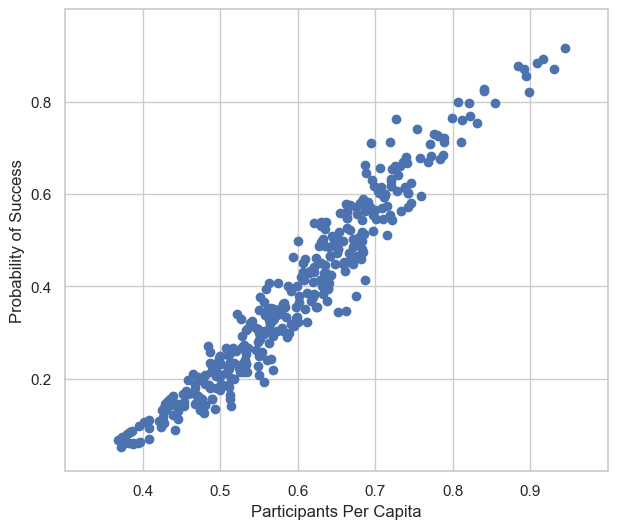

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

# Extract coefficients from the logistic regression results
const_coef = -2.8142
logged_population_coef = -0.1388
membership_per_capita_coef = 7.6475

# Calculate the predicted probability of success for each data point
prob_success = 1 / (1 + np.exp(-(const_coef + logged_population_coef * membership['LOGGED_POPULATION'] + membership_per_capita_coef * membership['MEMBERSHIP_PER_CAPITA'])))

# Create a scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(membership['MEMBERSHIP_PER_CAPITA'], prob_success, color=sns.color_palette("deep")[0], zorder = 2)
plt.xlabel('Participants Per Capita')
plt.ylabel('Probability of Success')

custom_xticks = np.arange(0.4, 1, 0.1)
plt.xticks(custom_xticks)
plt.xlim(0.3,1)

custom_yticks = np.arange(0.2, 0.8, 0.2)
plt.yticks(custom_yticks)
plt.ylim(0,1)

plt.grid(True, zorder = 1)
plt.show()


The above plot depicts the relationship between the number of participants per capita and logged population (on the x-axis)  and the predicted probability of success (on the y-axis). As we can see, the dots seem to create a slightly sigmoid shape, almost like a straight line. As a result, we can easily understand that there is almost a linear relationship between participants per capita and the probability of success. This means that, as the participants per capita increase, the campaign has more probabilities of becoming successful, which makes sense.

* Now, we are going to run a logistic regression, using only the membership per capita as an independent variable.

In [27]:
import statsmodels.api as sm

# Add a constant term to the independent variables
membership['const'] = 1

# Define the independent variables
X = membership[['const', 'MEMBERSHIP_PER_CAPITA']]

# Define the dependent variable
y = membership['SUCCESS']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                  0.1225
Time:                        20:18:10   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.3469      0.709     -7.536      0.000      -6.737      -3.956
MEMBERSHIP_PER_CAPITA     8.0495      1.141      7.052      0.000       5.812      10.287
=========================================================================================
"""

<u>Results Explanation</u>
    
* The regression results show that:

$$ \lg(\mathrm{success}) = -5.3469 + 8.0495 \lg(\mathrm{MembershipPerCapita}) $$

* The intercept represents the log-odds of success when 'MEMBERSHIP_PER_CAPITA' is zero. The negative coefficient suggests a lower log-odds of success, but it's statistically significant (p-value < 0.05).

* The coefficient for the predictor variable "MEMBERSHIP_PER_CAPITA" is 8.0495, and it is statistically significant (p-value < 0.05). This coefficient represents the log-odds ratio. The positive coefficient for "MEMBERSHIP_PER_CAPITA" suggests that an increase in this variable is associated with an increase in the log-odds of success.

* A one-unit increase in 'MEMBERSHIP_PER_CAPITA' is associated with an increase in the log-odds of success by 8.0495. Given that p-value < 0.05, this effect is considered statistically significant, so when the membership per capita increases, there is a higher probability that a campaign will be successful.

Now, we want to create a scatter plot showing the membership per capita, on the 𝑥 axis, and the probability of success, on the 𝑦 axis.
* The probability of success ($p(x)$) for one independent variable is given by the following type:

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$

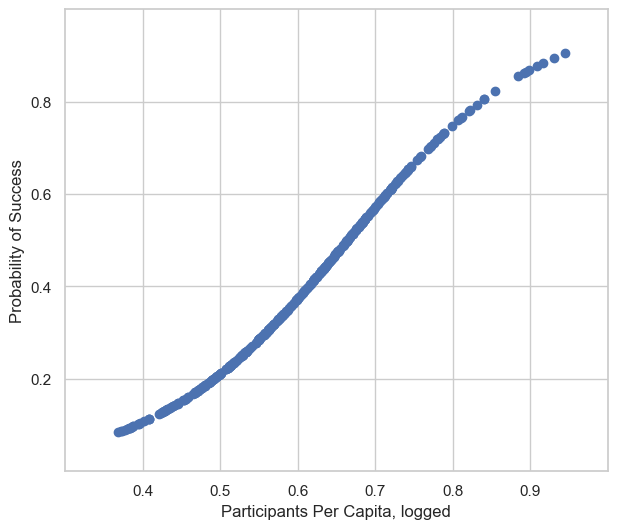

In [28]:
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

# Extract coefficients from the logistic regression results
const_coef = -5.3469
membership_per_capita_coef = 8.0495

# Calculate the predicted probability of success for each data point
prob_success = 1 / (1 + np.exp(-(const_coef + membership_per_capita_coef * membership['MEMBERSHIP_PER_CAPITA'])))

# Create a scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(membership['MEMBERSHIP_PER_CAPITA'], prob_success, color=sns.color_palette("deep")[0], zorder = 2)
plt.xlabel('Participants Per Capita, logged')
plt.ylabel('Probability of Success')

custom_xticks = np.arange(0.4, 1, 0.1)
plt.xticks(custom_xticks)
plt.xlim(0.3,1)

custom_yticks = np.arange(0.2, 0.8, 0.2)
plt.yticks(custom_yticks)
plt.ylim(0,1)

plt.grid(True, zorder = 1)
plt.show()

From the plot above, we can see that a sigmoid curve appears. In the context of logistic regression, the sigmoid function is commonly used to model the relationship between a predictor variable and the probability of a binary outcome. The sigmoid curve visualises the relationship between 'Participants Per Capita' and the predicted probability of success based on the logistic regression model. As 'Participants Per Capita' increases, the curve shows how the predicted probability of success changes, following the characteristics of the sigmoid function.

<h4>Comparison of plots</h4>
If we compare the two scatter plots, we can easily see that there is a difference in the thickness of the sigmoid curves. In he first scatter plot, that has two independent variables, if the two independent variables are correlated, or if there's an interaction effect between them, it can lead to a more complex relationship and a thicker sigmoid curve. In the second logistic regression with one independent variable, the model is simpler and results in a smoother curve since it's modeling the relationship between one predictor and the outcome.

## 4. The Level of Participation Tipping Point

As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.

Based on your data, create a table like the one below and explain how Chenoweth came up with the rule.

* First, we need to create a table with three columns: Peak Popular Participation (%), Observations and Success Rate. <br>
Let's start by making the first column. We will need to create the bins that will represent the percentage ranges that we need along with the labels of the column.

In [29]:
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.010, 0.035, 1]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

* We will use the cut() function for binning of continuous data into discrete intervals (bins). The right = False argument means that the intervals are left-inclusive and right-exclusive. As a result, a new column is created ('BIN'), where each value in the original column ('PERCENTAGE POPULAR PARTICIPATION') is assigned to the corresponding bin based on the specified bin edges and labels.

In [30]:
# Cut the 'PERCENTAGE POPULAR PARTICIPATION' column into bins
df['BIN'] = pd.cut(df['PERCENTAGE POPULAR PARTICIPATION'], bins=bins, labels=labels, right=False)

* As we did before, we need to check for any empty values in the participation column, so that we exclude the necessary rows.

In [31]:
df['PARTICIPATION'].isna().sum()

9

* We do not have any information on the participation of 9 campaigns, thus, we choose to drop the rows with null value in the participation row.

In [32]:
df.dropna(subset=['PARTICIPATION'], inplace=True)

* We will group by the bin column we created and with count() ['PERCENTAGE POPULAR PARTICIPATION'] we will get the number of observations per bin and with count() ['SUCCESS'] we get the number of successful campaigns per bin. We will also rename the column names and calculate the success rate which is the ratio number of successes to number of observations. We multiply the success rate by 100 and keep only two decimals so that it has the necessary format that we want.

In [33]:
summary_table = pd.DataFrame()
summary_table = df.groupby('BIN').agg({'PERCENTAGE POPULAR PARTICIPATION': 'count', 'SUCCESS': 'sum'}).reset_index()
summary_table.columns = ["Peak Popular Participation (%)", "Observations", "Successes"]
summary_table['Success Rate'] = (summary_table['Successes'] / summary_table['Observations'] * 100).round(2).astype(str) + '%'


* Now we need to sort the table by the Peak Popular Participation (%) column. However, given that the column is of categorical type, we need to make an ordering list and apply it to our column using the Categorical() method. We will also drop the successes column so there is not much noise in the table.

In [34]:
ordering_list = ['greater than 3.5%', '1.0% - 3.5%', '0.25% - 1.0%', '0.06% - 0.25%', '0.015% - 0.06%','0.0035% - 0.015%','less than 0.0035%']
summary_table['Peak Popular Participation (%)'] = pd.Categorical(summary_table['Peak Popular Participation (%)'], categories=ordering_list, ordered=True)
summary_table = summary_table.sort_values(by='Peak Popular Participation (%)')
summary_table = summary_table.drop(columns=['Successes'])
summary_table

,Peak Popular Participation (%),Observations,Success Rate
6,greater than 3.5%,18,88.89%
5,1.0% - 3.5%,41,60.98%
4,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
2,0.015% - 0.06%,66,24.24%
1,0.0035% - 0.015%,44,9.09%
0,less than 0.0035%,24,4.17%


A very famous output of the research conducted by Chenoweth is the 3.5% rule. The “3.5% rule” refers to the claim that no government has withstood a challenge of 3.5% of their population mobilized against it during a peak event. It is worth noting tht exception do exist as it is a rule rather than a law, meaning that a campaign can gather more than 3.5% and still not be successful. Furthermore, the participation refers to its peak number and not the cumulative participation that a campaign can gather over the years. From the table above, we can see that campaigns with peak participation 3.5% or more have almost 90% success, a quite safe number so to say that the rule in general is true, as almost all campaigns with such a peak participation percentage can be successful.

* Next, we need to calculate the percentage of the population that is the tipping point for success in a campaign with 99% probability. To do so, we will use the second logit regression that we ran with only one independent variable. As we can see from the scatter plot, there is no point that reaches the 99%. However, we can take into account that the model is an approach, thus, we can use the confidence intervals to find the point where y = 0.99 . 

* Let's calculate the confidence intervals for Membership Per Capita. <br><br>The coefficient for the MEMBERSHIP_PER_CAPITA variable is 8.0495 with a standard error of 1.141.<br>The most common confidence level is 95%, which corresponds to a z-score of approximately 1.96.<br>The margin of error for each coefficient is calculated by multiplying the standard error by the z-score.

In [42]:
errormargin = 1.96 * 1.141
errormargin

2.23636

   The confidence interval is given by the following type: Confidence Interval = Coefficient ± Margin of Error

In [43]:
conf_interval_min = 8.0495 - 2.23636
conf_interval_max = 8.0495 + 2.23636
conf_interval_min, conf_interval_max

(5.813140000000001, 10.28586)

## 5. Nonviolent Resistance and Target Regime Type
Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.

In [36]:
newdf = pd.read_excel('p5v2018.xlsx')
newdf

,p5,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,...,interim,bmonth,bday,byear,bprec,post,change,d5,sf,regtrans
0,0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,0,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,7001803,700,AFG,Afghanistan,1803,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,7001804,700,AFG,Afghanistan,1804,0,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17569,1,5522014,552,ZIM,Zimbabwe,2014,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,1,5522015,552,ZIM,Zimbabwe,2015,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17571,1,5522016,552,ZIM,Zimbabwe,2016,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17572,1,5522017,552,ZIM,Zimbabwe,2017,0,0.0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To run the necessary logistic regression we need the success column as a dependent variable and the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends as dependend variables. We only care for the nonviolent campaigns, thus, the condition nonviol == 1 must be met.

* First, let's take the necessary columns from the initial dataframe. We will use the log() function to find the log of participation. We will also take the column logged population from the membership dataframe as we don't need to calculate again the location’s logged population the year the campaign ends.

In [37]:
data = pd.DataFrame()
data = df[['LOCATION','EYEAR','NONVIOL','SUCCESS','PARTICIPATION']]
data['LOGGED_PARTICIPATION'] = np.log(data['PARTICIPATION'])
data['LOGGED_POPULATION'] = membership['LOGGED_POPULATION']
data

C:\Users\EFI\AppData\Local\Temp\ipykernel_15520\1933637213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LOGGED_PARTICIPATION'] = np.log(data['PARTICIPATION'])
C:\Users\EFI\AppData\Local\Temp\ipykernel_15520\1933637213.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LOGGED_POPULATION'] = membership['LOGGED_POPULATION']


,LOCATION,EYEAR,NONVIOL,SUCCESS,PARTICIPATION,LOGGED_PARTICIPATION,LOGGED_POPULATION
0,Afghanistan,1979,0,1,10000.0,9.210340,16.562781
1,Afghanistan,1989,0,1,10000.0,9.210340,16.496532
2,Afghanistan,1996,0,1,20000.0,9.903488,16.924572
3,Afghanistan,2014,0,0,60000.0,11.002100,17.424293
4,Albania,1991,1,1,300000.0,12.611538,15.007682
...,...,...,...,...,...,...,...
384,Zambia,1963,1,1,1000000.0,13.815511,15.070557
385,Zambia,1991,1,1,23000.0,10.043249,15.924478
386,Zambia,2001,1,1,3000.0,8.006368,16.197288
387,Zimbabwe,1979,0,0,1000.0,6.907755,15.745165


* Now, we need to extract the polity score for the specific location and year of each campaign in the dataframe. We create a new df where we take the necessary columns and we merge the two dataframes, only when the location and the year columns are the same for the two dataframes. The reason we do this, is because we need the polity score only for the campaigns of our data dataframe.

In [38]:
polity = pd.DataFrame()
polity[['LOCATION', 'EYEAR', 'POLITY_SCORE']] = newdf[['country', 'year', 'polity']]

In [39]:
merged_df = pd.merge(data, polity[['LOCATION', 'EYEAR', 'POLITY_SCORE']], on=['LOCATION', 'EYEAR'])
merged_df

,LOCATION,EYEAR,NONVIOL,SUCCESS,PARTICIPATION,LOGGED_PARTICIPATION,LOGGED_POPULATION,POLITY_SCORE
0,Afghanistan,1979,0,1,10000.0,9.210340,16.562781,-66
1,Afghanistan,1989,0,1,10000.0,9.210340,16.496532,-8
2,Afghanistan,1996,0,1,20000.0,9.903488,16.924572,-7
3,Afghanistan,2014,0,0,60000.0,11.002100,17.424293,-1
4,Albania,1991,1,1,300000.0,12.611538,15.007682,-88
...,...,...,...,...,...,...,...,...
300,Yugoslavia,1998,1,0,10000.0,9.210340,16.176365,-6
301,Yugoslavia,1992,0,1,12500.0,9.433484,16.166886,-5
302,Zambia,1991,1,1,23000.0,10.043249,15.924478,6
303,Zambia,2001,1,1,3000.0,8.006368,16.197288,5


* Let's keep only the nonviolent campaigns.

In [40]:
merged_df = merged_df[merged_df['NONVIOL'] == 1]

* Now we can run the logistic regression. The model has three independent variable so it will be of type $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 $

In [41]:
import statsmodels.api as sm

# Add a constant term to the independent variables
merged_df['const'] = 1

# Define the independent variables
X = merged_df[['const', 'LOGGED_PARTICIPATION', 'LOGGED_POPULATION', 'POLITY_SCORE']]

# Define the dependent variable
y = merged_df['SUCCESS']

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.643258
         Iterations 5


C:\Users\EFI\AppData\Local\Temp\ipykernel_15520\2668991546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  137
Model:                          Logit   Df Residuals:                      133
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                 0.05262
Time:                        20:18:43   Log-Likelihood:                -88.126
converged:                       True   LL-Null:                       -93.021
Covariance Type:            nonrobust   LLR p-value:                   0.02044
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4621      2.034      0.227      0.820      -3.524       4.448
LOGGED_PARTICIPATION     0.3027      0.103      2.930      0.003       0.100       0.505
LOGGED_POPULATION       -0.2054      0.130     -1.575      0.115      -0.461       0.050
POLITY_SCORE            -0.0014      0.005     -0.256      0.798      -0.012       0.009
========================================================================================
"""

<u>Results Explanation</u>
    
* The regression results show that:

$$ \lg(\mathrm{success}) = 0.4621 + 0.3027 \lg(\mathrm{LoggedParticipation}) - 0.2054 \lg(\mathrm{LoggedPopulation}) - 0.0014	 \lg(\mathrm{PolityScore}) $$

* The intercept represents the log-odds of the dependent variable when all predictor variables are zero. In this case, the intercept is 0.4621, but it is not statistically significant (p-value > 0.05), indicating that the log-odds at zero values of the predictors are not significantly different from zero.

* A  one-unit increase in the logged participation is associated with an increase in the log-odds of the dependent variable by 0.3027. The positive coefficient is statistically significant (p-value < 0.05), suggesting that higher logged participation is associated with an increased likelihood of the event.

* A one-unit increase in the logged population is associated with a decrease in the log-odds of the dependent variable by 0.2054. However, the negative coefficient is not statistically significant (p-value > 0.05), suggesting that the effect is not significant at the conventional significance level.

* A one-unit increase in the polity score is associated with a decrease in the log-odds of the dependent variable by 0.0014. The coefficient is not statistically significant (p-value > 0.05), suggesting that the polity score does not have a significant effect on the outcome.

<b>In General</b>
* The model suggests that logged participation is a statistically significant predictor of the dependent variable, with a positive effect.
* Logged population and polity score, on the other hand, do not appear to be statistically significant predictors in this model.